In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scikit_posthocs as sp
from sklearn import datasets # sample data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

iris = sns.load_dataset('iris')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [54]:
# box & swarm plot
rows = 2
columns = 2
graphs = rows*columns
axes = []
factors = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig = plt.figure(figsize=(20,10),dpi=600)

for index, factor in enumerate(factors):
    axes.append(fig.add_subplot(rows, columns, index+1))
    axes[index].set_title('Species: {0}'.format(factor), fontsize=20)
    axes[index].set_xlabel('Species', fontsize=20)
    axes[index].set_ylabel(factor, fontsize=20)
    axes[index].tick_params(labelsize=15, labelrotation=0)
    # color palette: dict type
    pal = {species: 'steelblue' if species == 'setosa' else 'mediumorchid' if species == 'versicolor' else 'firebrick' for species in iris.species.unique()}
    # box plot
    sns.boxplot(x='species', y=factor, data=iris, palette=pal, ax=axes[index])
    # swarm plot
    sns.swarmplot(x='species', y=factor, data=iris, color='gray', alpha=0.3, ax=axes[index])
    # change edge color
    for i, artist in enumerate(axes[index].artists):
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_alpha(0.4)
        for j in range(i*6,i*6+6):
            line = axes[index].lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)

fig.subplots_adjust(hspace=0.4)
fig.savefig('./graphImages/box_scatter.png')
fig.show()

/usr/local/var/pyenv/versions/3.8.2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-54-40dc3fed81d4>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<ipython-input-55-9153af859cb6>:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


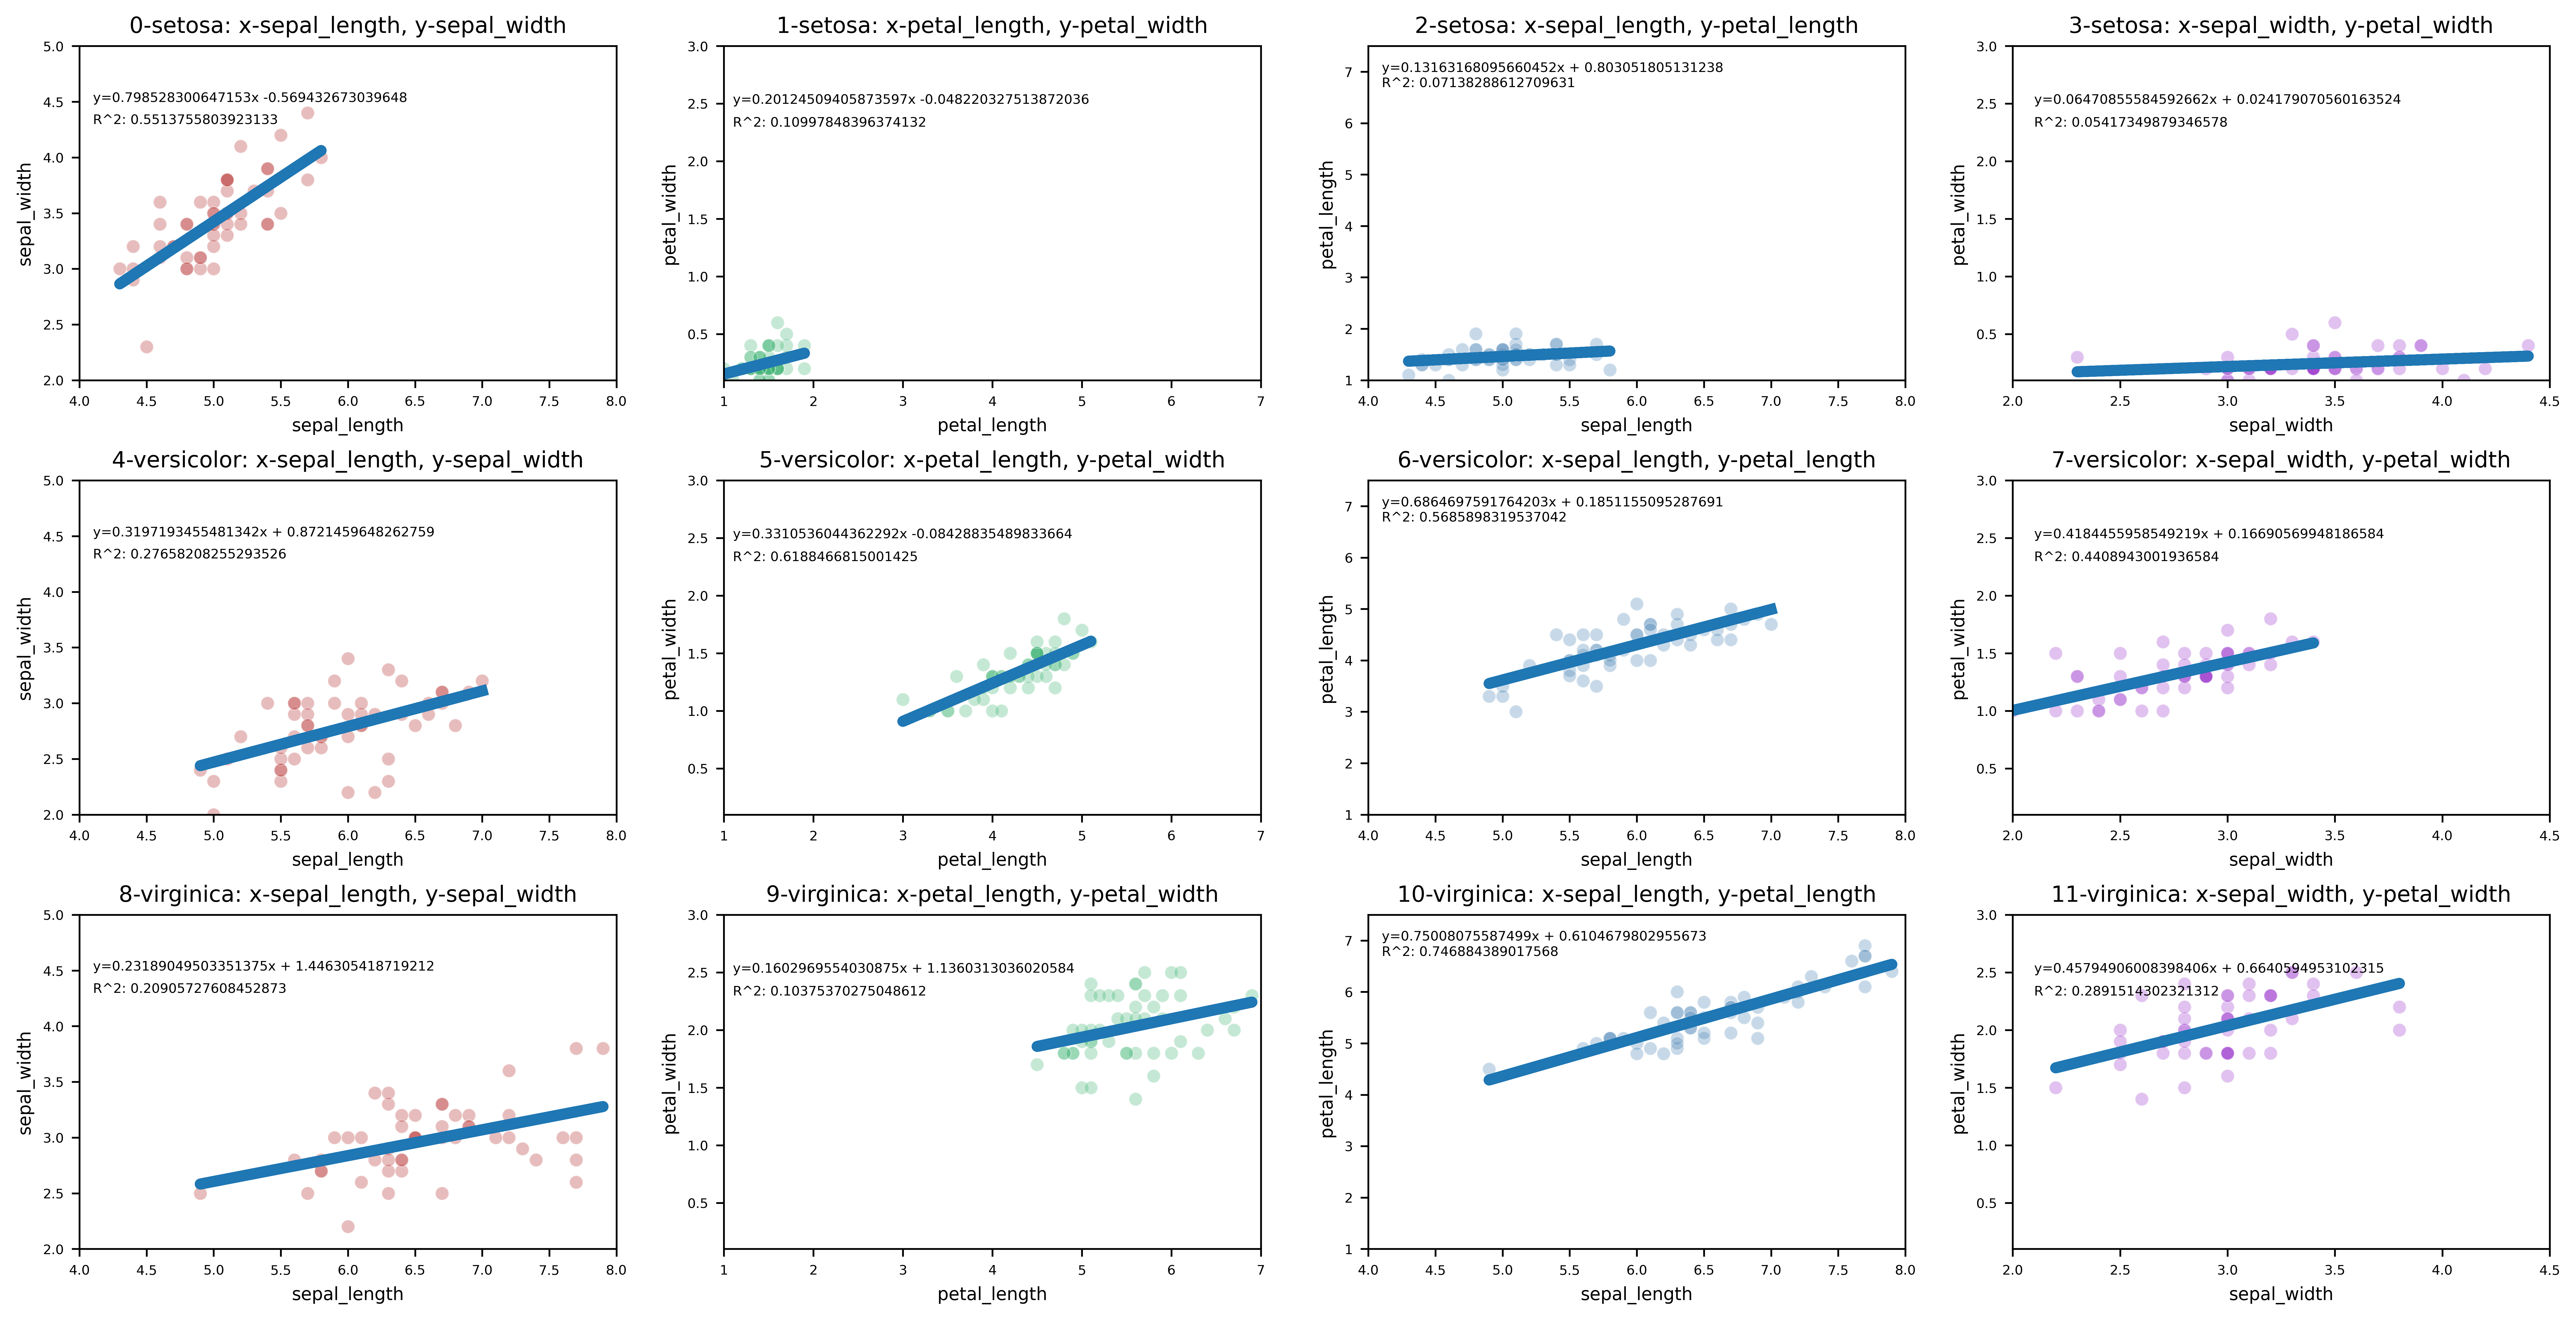

In [55]:
# scatte plot & line regression
rows = 3
columns = 4
graphs = rows*columns
axes = []
species = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize=(20,10),dpi=600)

for index, data in enumerate(species):
    for i in range(0, columns):
        axes.append(fig.add_subplot(rows, columns, index*columns+i+1))
        if i % 4 == 0:
            axes[index*columns+i].set_title('{1}-{0}: x-sepal_length, y-sepal_width'.format(data, index*columns+i), fontsize=10)
            axes[index*columns+i].set_xlabel('sepal_length', fontsize=8)
            axes[index*columns+i].set_ylabel('sepal_width', fontsize=8)
            axes[index*columns+i].tick_params(labelsize=6, labelrotation=0)
            axes[index*columns+i].set_xlim(4.0, 8.0)
            axes[index*columns+i].set_ylim(2.0, 5.0)
            # line regression & values
            reg = LinearRegression().fit(iris.query('species == @data')[['sepal_length']], iris.query('species == @data')[['sepal_width']])
            axes[index*columns+i].plot(iris.query('species == @data')[['sepal_length']].values, reg.intercept_+reg.coef_*iris.query('species == @data')[['sepal_length']].values, linewidth=5)
            axes[index*columns+i].text(4.1, 4.5, 'y={0}x{1}{2}'.format(reg.coef_[0][0], " + " if reg.intercept_[0]>0 else " ", reg.intercept_[0]), color='black', size=6)
            axes[index*columns+i].text(4.1, 4.3, 'R^2: {0}'.format( r2_score(iris.query('species == @data')[['sepal_width']], reg.predict(iris.query('species == @data')[['sepal_length']])) ), color='black', size=6)
            sns.scatterplot(x='sepal_length', y='sepal_width', data=iris.query('species == @data'), color='firebrick', alpha=0.3, ax=axes[index*columns+i])
        elif i % 4 == 1:
            axes[index*columns+i].set_title('{1}-{0}: x-petal_length, y-petal_width'.format(data, index*columns+i), fontsize=10)
            axes[index*columns+i].set_xlabel('petal_length', fontsize=8)
            axes[index*columns+i].set_ylabel('petal_width', fontsize=8)
            axes[index*columns+i].tick_params(labelsize=6, labelrotation=0)
            axes[index*columns+i].set_xlim(1.0, 7.0)
            axes[index*columns+i].set_ylim(0.1, 3.0)
            # line regression & values
            reg = LinearRegression().fit(iris.query('species == @data')[['petal_length']], iris.query('species == @data')[['petal_width']])
            axes[index*columns+i].plot(iris.query('species == @data')[['petal_length']].values, reg.intercept_+reg.coef_*iris.query('species == @data')[['petal_length']].values, linewidth=5)
            axes[index*columns+i].text(1.1, 2.5, 'y={0}x{1}{2}'.format(reg.coef_[0][0], " + " if reg.intercept_[0]>0 else " ", reg.intercept_[0]), color='black', size=6)
            axes[index*columns+i].text(1.1, 2.3, 'R^2: {0}'.format( r2_score(iris.query('species == @data')[['petal_width']], reg.predict(iris.query('species == @data')[['petal_length']])) ), color='black', size=6)
            sns.scatterplot(x='petal_length', y='petal_width', data=iris.query('species == @data'), color='mediumseagreen', alpha=0.3, ax=axes[index*columns+i])
        elif i% 4 == 2:
            axes[index*columns+i].set_title('{1}-{0}: x-sepal_length, y-petal_length'.format(data, index*columns+i), fontsize=10)
            axes[index*columns+i].set_xlabel('sepal_length', fontsize=8)
            axes[index*columns+i].set_ylabel('petal_length', fontsize=8)
            axes[index*columns+i].tick_params(labelsize=6, labelrotation=0)
            axes[index*columns+i].set_xlim(4.0, 8.0)
            axes[index*columns+i].set_ylim(1.0, 7.5)
            # line regression & values
            reg = LinearRegression().fit(iris.query('species == @data')[['sepal_length']], iris.query('species == @data')[['petal_length']])
            axes[index*columns+i].plot(iris.query('species == @data')[['sepal_length']].values, reg.intercept_+reg.coef_*iris.query('species == @data')[['sepal_length']].values, linewidth=5)
            axes[index*columns+i].text(4.1, 7.0, 'y={0}x{1}{2}'.format(reg.coef_[0][0], " + " if reg.intercept_[0]>0 else " ", reg.intercept_[0]), color='black', size=6)
            axes[index*columns+i].text(4.1, 6.7, 'R^2: {0}'.format( r2_score(iris.query('species == @data')[['petal_length']], reg.predict(iris.query('species == @data')[['sepal_length']])) ), color='black', size=6)
            sns.scatterplot(x='sepal_length', y='petal_length', data=iris.query('species == @data'), color='steelblue', alpha=0.3, ax=axes[index*columns+i])
        else:
            axes[index*columns+i].set_title('{1}-{0}: x-sepal_width, y-petal_width'.format(data, index*columns+i), fontsize=10)
            axes[index*columns+i].set_xlabel('sepal_width', fontsize=8)
            axes[index*columns+i].set_ylabel('petal_width', fontsize=8)
            axes[index*columns+i].tick_params(labelsize=6, labelrotation=0)
            axes[index*columns+i].set_xlim(2.0, 4.5)
            axes[index*columns+i].set_ylim(0.1, 3.0)
            # line regression & values
            reg = LinearRegression().fit(iris.query('species == @data')[['sepal_width']], iris.query('species == @data')[['petal_width']])
            axes[index*columns+i].plot(iris.query('species == @data')[['sepal_width']].values, reg.intercept_+reg.coef_*iris.query('species == @data')[['sepal_width']].values, linewidth=5)
            axes[index*columns+i].text(2.1, 2.5, 'y={0}x{1}{2}'.format(reg.coef_[0][0], " + " if reg.intercept_[0]>0 else " ", reg.intercept_[0]), color='black', size=6)
            axes[index*columns+i].text(2.1, 2.3, 'R^2: {0}'.format( r2_score(iris.query('species == @data')[['petal_width']], reg.predict(iris.query('species == @data')[['sepal_width']])) ), color='black', size=6)
            sns.scatterplot(x='sepal_width', y='petal_width', data=iris.query('species == @data'), color='darkorchid', alpha=0.3, ax=axes[index*columns+i])

fig.subplots_adjust(hspace=0.3, wspace=0.2)
fig.savefig('./graphImages/scatter_regression.png')
fig.show()